In [245]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [246]:
pca = PCA(svd_solver='auto')

In [247]:
for i in range(45):
    if i==0:
        train = pd.read_pickle('salida/nuevo4b/SICK/TRAIN_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4b/SICK/TRAIN_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            print(i+1)

In [248]:
train=train.reset_index(drop=True)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,...,list_m,list_T,Jaro-Winkler_rit,rel_conceptuales,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,0.000000,2.097,0.000,0.000000,0.000000,0.000000,1,0.000000,0,...,0,8,0.857143,0,0,,0,,0.800000,CONTRADICTION
1,0.000000,0.000000,1.913,0.000,0.000000,0.000000,0.000000,2,0.000000,0,...,0,7,0.875000,1,0,,0,,0.333333,CONTRADICTION
2,0.000000,0.000000,2.176,0.000,0.000000,0.000000,0.000000,1,0.000000,0,...,0,7,1.000000,0,0,,0,,0.400000,ENTAILMENT
3,0.361657,4.241265,1.909,1.400,3.811703,0.006280,0.140442,1,0.600000,0,...,3,5,0.375000,1,0,,0,,0.333333,CONTRADICTION
4,0.467000,4.242607,2.183,1.441,3.821563,0.005581,0.155224,2,0.428571,1,...,3,7,0.500000,0,0,,0,,0.166667,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4434,0.062812,5.751723,1.053,0.811,3.786475,0.006455,0.084316,1,1.333333,0,...,4,3,0.333333,0,0,,0,,0.200000,CONTRADICTION
4435,0.073710,5.698565,1.384,1.384,3.779084,0.008525,0.056842,0,1.333333,0,...,4,3,0.250000,0,0,,1,play,0.000000,CONTRADICTION
4436,0.274907,2.850390,1.688,1.371,3.787387,0.006522,0.202038,3,0.400000,1,...,2,5,0.000000,0,0,,0,,0.000000,CONTRADICTION
4437,0.358468,1.437292,1.411,1.459,3.685267,0.004270,0.156616,1,0.166667,0,...,1,6,0.333333,0,0,,0,,0.333333,CONTRADICTION


In [249]:
train=train.drop(["verbH","verbT"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,rel_conceptuales,negT,negH,overlap_ent,clases
0,0.000000,0.000000,2.097,0.000,0.000000,0.000000,0.000000,1,0.000000,0,7,0,8,0.857143,0,0,0,0.800000,CONTRADICTION
1,0.000000,0.000000,1.913,0.000,0.000000,0.000000,0.000000,2,0.000000,0,8,0,7,0.875000,1,0,0,0.333333,CONTRADICTION
2,0.000000,0.000000,2.176,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,7,1.000000,0,0,0,0.400000,ENTAILMENT
3,0.361657,4.241265,1.909,1.400,3.811703,0.006280,0.140442,1,0.600000,0,8,3,5,0.375000,1,0,0,0.333333,CONTRADICTION
4,0.467000,4.242607,2.183,1.441,3.821563,0.005581,0.155224,2,0.428571,1,8,3,7,0.500000,0,0,0,0.166667,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4434,0.062812,5.751723,1.053,0.811,3.786475,0.006455,0.084316,1,1.333333,0,6,4,3,0.333333,0,0,0,0.200000,CONTRADICTION
4435,0.073710,5.698565,1.384,1.384,3.779084,0.008525,0.056842,0,1.333333,0,4,4,3,0.250000,0,0,1,0.000000,CONTRADICTION
4436,0.274907,2.850390,1.688,1.371,3.787387,0.006522,0.202038,3,0.400000,1,6,2,5,0.000000,0,0,0,0.000000,CONTRADICTION
4437,0.358468,1.437292,1.411,1.459,3.685267,0.004270,0.156616,1,0.166667,0,3,1,6,0.333333,0,0,0,0.333333,CONTRADICTION


In [201]:
temp1 = pd.read_csv("../OPENAI/data/SICK/original/SICK_TRAIN.csv")
temp1

,sentence_A,sentence_B,entailment_label
0,A group of kids is playing in a yard and an ol...,A group of boys in a yard is playing and a man...,NEUTRAL
1,A group of children is playing in the house an...,A group of kids is playing in a yard and an ol...,NEUTRAL
2,The young boys are playing outdoors and the ma...,The kids are playing outdoors near a man with ...,ENTAILMENT
3,The kids are playing outdoors near a man with ...,A group of kids is playing in a yard and an ol...,NEUTRAL
4,The young boys are playing outdoors and the ma...,A group of kids is playing in a yard and an ol...,NEUTRAL
...,...,...,...
4434,A door is being opened by a man,A bald man in a band is playing guitar in the ...,NEUTRAL
4435,Someone is boiling okra in a pot,The man is not playing the drums,NEUTRAL
4436,The man is singing heartily and playing the gu...,A bicyclist is holding a bike over his head in...,NEUTRAL
4437,A man in blue has a yellow ball in the mitt,A man is jumping rope outside,NEUTRAL


In [202]:
train["clases"]=temp1["entailment_label"]
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,rel_conceptuales,negT,negH,overlap_ent,clases
0,0.000000,0.000000,2.097,0.000,0.000000,0.000000,0.000000,1,0.000000,0,7,0,8,0.857143,0,0,0,0.800000,NEUTRAL
1,0.000000,0.000000,1.913,0.000,0.000000,0.000000,0.000000,2,0.000000,0,8,0,7,0.875000,1,0,0,0.333333,NEUTRAL
2,0.000000,0.000000,2.176,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,7,1.000000,0,0,0,0.400000,ENTAILMENT
3,0.361657,4.241265,1.909,1.400,3.811703,0.006280,0.140442,1,0.600000,0,8,3,5,0.375000,1,0,0,0.333333,NEUTRAL
4,0.467000,4.242607,2.183,1.441,3.821563,0.005581,0.155224,2,0.428571,1,8,3,7,0.500000,0,0,0,0.166667,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4434,0.062812,5.751723,1.053,0.811,3.786475,0.006455,0.084316,1,1.333333,0,6,4,3,0.333333,0,0,0,0.200000,NEUTRAL
4435,0.073710,5.698565,1.384,1.384,3.779084,0.008525,0.056842,0,1.333333,0,4,4,3,0.250000,0,0,1,0.000000,NEUTRAL
4436,0.274907,2.850390,1.688,1.371,3.787387,0.006522,0.202038,3,0.400000,1,6,2,5,0.000000,0,0,0,0.000000,NEUTRAL
4437,0.358468,1.437292,1.411,1.459,3.685267,0.004270,0.156616,1,0.166667,0,3,1,6,0.333333,0,0,0,0.333333,NEUTRAL


In [250]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [251]:
len(y_)

4439

In [252]:
# RTE3
y_t=[]
for i in y_:
    if i == "ENTAILMENT":
        y_t.append(1)
    elif i == "NEUTRAL":
        y_t.append(2)
    else:
        y_t.append(0)

In [253]:
len(y_t)

4439

In [207]:
# scaler = preprocessing.MaxAbsScaler().fit(X)
# X_scaled = scaler.transform(X)
# X = X_scaled

In [254]:
y_.unique()

array(['CONTRADICTION', 'ENTAILMENT'], dtype=object)

In [255]:
Y_pca = pca.fit_transform(X)

In [256]:
pca_vr=pca.explained_variance_ratio_
print(pca_vr)

[5.12562437e-01 2.90638782e-01 8.22609426e-02 4.25355884e-02
 2.95656694e-02 1.01126497e-02 9.54939914e-03 8.74642926e-03
 3.87144439e-03 2.33429531e-03 2.16202848e-03 1.97729458e-03
 1.66021280e-03 1.27227201e-03 5.74088602e-04 1.54096012e-04
 2.22207976e-05 1.49899468e-07]


In [257]:
def distribucion_vr(D,titulo='Distribucion de Varianzas'):
    
    d=[]
    y=0
    for x in D:
        y+=x
        d.append(y)
    
    """Areas de Graficacion y visualizacion de los datos"""
    fig,ax = plt.subplots(figsize=(8,5))
    
    pasos=range(len(D))
    datos=np.array(list(map(lambda x,y:[x,y],pasos,d)))
    ax.plot(datos[:,0],datos[:,1],
            ls='--',
            color='green',
            linewidth=1,
            label='Contribucion acumulada')
    plt.title(titulo)
    plt.xlabel('Componente')
    plt.ylabel('Proporción')
    plt.grid(True)
    ax.xaxis.grid(True, which='minor')
    ax.yaxis.grid(True, which='minor')
    ax.grid(which='major', color='gray', linestyle='-')
    ax.grid(which='minor', color='grey', linestyle='--')
    ax.legend()

    return ax

<Axes: title={'center': 'Distribucion de Varianzas'}, xlabel='Componente', ylabel='Proporción'>

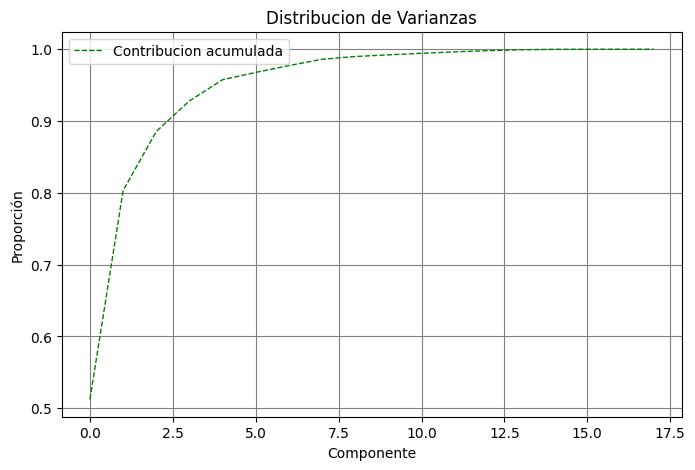

In [258]:
distribucion_vr(pca_vr)

In [259]:
pca_clases = PCA(n_components=2)

In [260]:
principalComponents=pca_clases.fit_transform(X)

In [261]:
principalComponents

array([[-0.96039906,  4.59813438],
       [-0.69175934,  4.45373638],
       [-1.92372816,  2.76759437],
       ...,
       [ 2.89242217, -0.36584497],
       [ 0.52981679, -0.85812825],
       [ 1.73056734, -2.24154115]])

In [262]:
principal_Df = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])

In [263]:
principal_Df

,pc1,pc2
0,-0.960399,4.598134
1,-0.691759,4.453736
2,-1.923728,2.767594
3,4.740650,0.248855
4,5.248059,1.712512
...,...,...
4434,4.710029,-2.826163
4435,3.995695,-4.006639
4436,2.892422,-0.365845
4437,0.529817,-0.858128


# PCA vs LDA

In [264]:
print(len(X))

4439


In [265]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)


In [266]:
len(y_)

4439

In [267]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y_).transform(X)

ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

In [268]:
# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

explained variance ratio (first two components): [0.51256244 0.29063878]


In [269]:
len(X_r)

4439

In [270]:
len(X_r[y_ == i, 0])

3165

<Figure size 640x480 with 0 Axes>

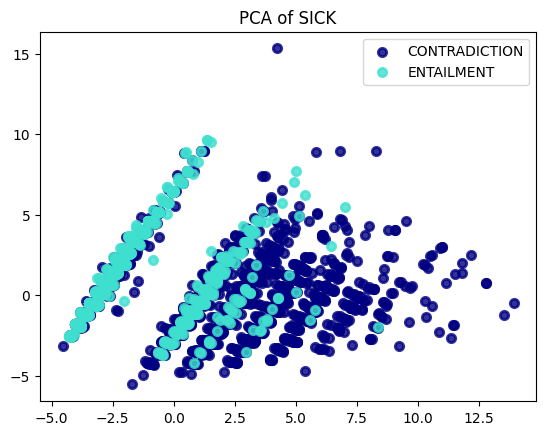

<Figure size 640x480 with 0 Axes>

In [271]:
plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2
for color, i, target_name in zip(colors, y_.unique(), y_.unique()):
    plt.scatter(
        X_r[y_ == i, 0], X_r[y_ == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of SICK")

plt.figure()

Text(0.5, 1.0, 'LDA of SICK')

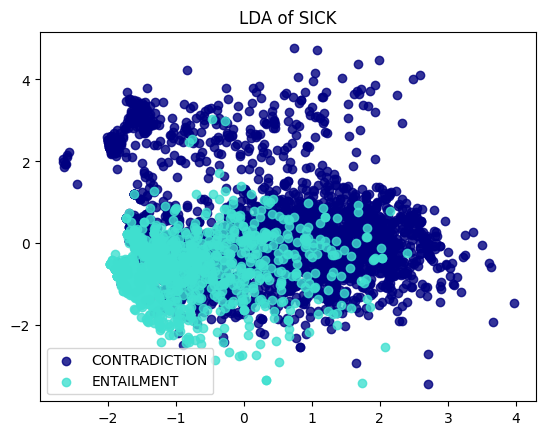

In [272]:
plt.figure()
for color, i, target_name in zip(colors, y_.unique(), y_.unique()):
    plt.scatter(
        X_r2[y_ == i, 0], X_r2[y_ == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of SICK")

# Proyection 3d

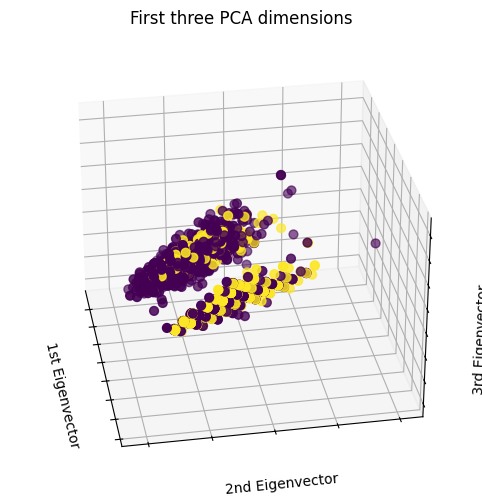

In [273]:
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=10)

X_reduced = PCA(n_components=3).fit_transform(X)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y_t,
    s=40,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

In [274]:
len(X_r)

4439

In [275]:
y_.values

array(['CONTRADICTION', 'CONTRADICTION', 'ENTAILMENT', ...,
       'CONTRADICTION', 'CONTRADICTION', 'CONTRADICTION'], dtype=object)

In [276]:
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef

In [277]:
model = LogisticRegression(penalty="l2", C=1,max_iter=500)
model.fit(X_r,y_t)

LogisticRegression(C=1, max_iter=500)

In [279]:
for i in range(50):
    if i==0:
        test = pd.read_pickle('salida/nuevo4b/SICK/TEST_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4b/SICK/TEST_'+str(i+1)+'.csv_.pickle')
            test=pd.concat([test,temp])
        except:
            print(i+1)

In [280]:
test = test.reset_index(drop=True)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,...,list_m,list_T,Jaro-Winkler_rit,rel_conceptuales,negT,verbT,negH,verbH,overlap_ent,clases
0,0.423790,5.644226,2.089,1.685,3.811686,0.005501,0.190288,2,0.800000,0,...,4,5,0.375000,0,0,,0,,0.000000,CONTRADICTION
1,0.361121,2.850177,2.018,1.264,3.855514,0.005729,0.118164,2,0.285714,0,...,2,7,0.714286,0,0,,0,,0.666667,CONTRADICTION
2,0.368295,2.836368,1.951,1.095,3.814045,0.005747,0.096256,3,0.285714,0,...,2,7,0.428571,0,0,,0,,0.333333,CONTRADICTION
3,0.000000,0.000000,1.881,0.000,0.000000,0.000000,0.000000,0,0.000000,0,...,0,8,1.000000,0,0,,0,,1.000000,ENTAILMENT
4,0.203490,1.437611,1.611,0.985,3.978109,0.006914,0.074974,0,0.142857,0,...,1,7,0.857143,0,0,,0,,0.833333,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4901,0.165464,4.327404,1.919,1.472,3.803848,0.005847,0.114092,0,0.600000,0,...,3,5,0.250000,0,0,,0,,0.250000,CONTRADICTION
4902,-0.007229,2.913927,1.579,1.157,3.769402,0.005909,0.063093,2,0.400000,0,...,2,5,0.250000,0,0,,0,,0.000000,CONTRADICTION
4903,0.100575,4.322275,0.748,0.414,3.687710,0.006140,0.116333,1,0.750000,0,...,3,4,0.000000,1,0,,0,,0.000000,CONTRADICTION
4904,0.486279,6.997520,1.393,1.199,3.814937,0.006552,0.144823,2,0.833333,0,...,5,6,0.375000,1,0,,0,,0.000000,CONTRADICTION


In [233]:
temp1 = pd.read_csv("../OPENAI/data/SICK/original/SICK_TEST.csv")
temp1

,sentence_A,sentence_B,entailment_label
0,There is no boy playing outdoors and there is ...,A group of kids is playing in a yard and an ol...,NEUTRAL
1,A group of boys in a yard is playing and a man...,The young boys are playing outdoors and the ma...,NEUTRAL
2,A group of children is playing in the house an...,The young boys are playing outdoors and the ma...,NEUTRAL
3,A brown dog is attacking another animal in fro...,A brown dog is attacking another animal in fro...,ENTAILMENT
4,A brown dog is attacking another animal in fro...,A brown dog is helping another animal in front...,NEUTRAL
...,...,...,...
4901,The young girl is blowing a bubble that is huge,There is no girl in pink twirling a ribbon,NEUTRAL
4902,A dog in a colored coat is running across the ...,The flute is being played by one man,NEUTRAL
4903,A boy is happily playing the piano,A white bird is landing swiftly in the water,NEUTRAL
4904,"The girl, who is little, is combing her hair i...",Two people wearing helmets are driving over th...,NEUTRAL


In [234]:
test["clases"]=temp1["entailment_label"]
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,...,list_m,list_T,Jaro-Winkler_rit,rel_conceptuales,negT,verbT,negH,verbH,overlap_ent,clases
0,0.423790,5.644226,2.089,1.685,3.811686,0.005501,0.190288,2,0.800000,0,...,4,5,0.375000,0,0,,0,,0.000000,NEUTRAL
1,0.361121,2.850177,2.018,1.264,3.855514,0.005729,0.118164,2,0.285714,0,...,2,7,0.714286,0,0,,0,,0.666667,NEUTRAL
2,0.368295,2.836368,1.951,1.095,3.814045,0.005747,0.096256,3,0.285714,0,...,2,7,0.428571,0,0,,0,,0.333333,NEUTRAL
3,0.000000,0.000000,1.881,0.000,0.000000,0.000000,0.000000,0,0.000000,0,...,0,8,1.000000,0,0,,0,,1.000000,ENTAILMENT
4,0.203490,1.437611,1.611,0.985,3.978109,0.006914,0.074974,0,0.142857,0,...,1,7,0.857143,0,0,,0,,0.833333,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4901,0.165464,4.327404,1.919,1.472,3.803848,0.005847,0.114092,0,0.600000,0,...,3,5,0.250000,0,0,,0,,0.250000,NEUTRAL
4902,-0.007229,2.913927,1.579,1.157,3.769402,0.005909,0.063093,2,0.400000,0,...,2,5,0.250000,0,0,,0,,0.000000,NEUTRAL
4903,0.100575,4.322275,0.748,0.414,3.687710,0.006140,0.116333,1,0.750000,0,...,3,4,0.000000,1,0,,0,,0.000000,NEUTRAL
4904,0.486279,6.997520,1.393,1.199,3.814937,0.006552,0.144823,2,0.833333,0,...,5,6,0.375000,1,0,,0,,0.000000,NEUTRAL


In [281]:
test=test.drop(["verbH","verbT"],axis=1)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,rel_conceptuales,negT,negH,overlap_ent,clases
0,0.423790,5.644226,2.089,1.685,3.811686,0.005501,0.190288,2,0.800000,0,8,4,5,0.375000,0,0,0,0.000000,CONTRADICTION
1,0.361121,2.850177,2.018,1.264,3.855514,0.005729,0.118164,2,0.285714,0,7,2,7,0.714286,0,0,0,0.666667,CONTRADICTION
2,0.368295,2.836368,1.951,1.095,3.814045,0.005747,0.096256,3,0.285714,0,7,2,7,0.428571,0,0,0,0.333333,CONTRADICTION
3,0.000000,0.000000,1.881,0.000,0.000000,0.000000,0.000000,0,0.000000,0,7,0,8,1.000000,0,0,0,1.000000,ENTAILMENT
4,0.203490,1.437611,1.611,0.985,3.978109,0.006914,0.074974,0,0.142857,0,7,1,7,0.857143,0,0,0,0.833333,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4901,0.165464,4.327404,1.919,1.472,3.803848,0.005847,0.114092,0,0.600000,0,4,3,5,0.250000,0,0,0,0.250000,CONTRADICTION
4902,-0.007229,2.913927,1.579,1.157,3.769402,0.005909,0.063093,2,0.400000,0,4,2,5,0.250000,0,0,0,0.000000,CONTRADICTION
4903,0.100575,4.322275,0.748,0.414,3.687710,0.006140,0.116333,1,0.750000,0,5,3,4,0.000000,1,0,0,0.000000,CONTRADICTION
4904,0.486279,6.997520,1.393,1.199,3.814937,0.006552,0.144823,2,0.833333,0,8,5,6,0.375000,1,0,0,0.000000,CONTRADICTION


In [282]:
X_t = test.drop(['clases'],axis=1)
y_t1 = test['clases']

In [283]:
# SICK
y_test=[]
for i in y_t1:
    if i == "ENTAILMENT":
        y_test.append(1)
    elif i == "NEUTRAL":
        y_test.append(2)
    else:
        y_test.append(0)

In [284]:
X_test=pca.transform(X_t)
X_test

array([[ 6.10076987, -0.25116759],
       [ 3.57388074,  1.65855708],
       [ 3.61050314,  1.68273451],
       ...,
       [ 3.19688172, -2.12397638],
       [ 7.43801637,  0.02092574],
       [ 5.35713919, -0.54702266]])

In [285]:
predictions = model.predict(X_test)

In [287]:
print(confusion_matrix(y_test, predictions,labels=[1,0]))

[[ 503  901]
 [ 439 3063]]


In [289]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.73
precision:  0.53
recall 0.36
f1_score:  0.43
matthews_score:  0.27


In [292]:
X_cv=np.concatenate((X_r, X_test), axis=0)
Y_cv=np.concatenate((y_t, y_test), axis=0)

In [293]:
y_t

[0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,


In [295]:
print(len(X_r))
print(len(y_t))
print(len(X_test))
print(len(y_test))

4439
4439
4906
4906


In [296]:
X_train_cv=X_cv
Y_train_cv=Y_cv

In [297]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acurracy:" , round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_weighted')
msg += "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_weighted')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_weighted')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression Acurracy:: 0.720000 (0.044328)
Logistic Regression Precision:: 0.710000 (0.060325)
Logistic Regression Recall:: 0.720000 (0.044328)
Logistic Regression F1-score:: 0.700000 (0.073852)


In [298]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acurracy:" , round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg += "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression Acurracy:: 0.720000 (0.044328)
Logistic Regression Precision:: 0.520000 (0.040080)
Logistic Regression Recall:: 0.400000 (0.194487)
Logistic Regression F1-score:: 0.420000 (0.136338)
